<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/Pr%C3%A1cticaRegresionDatosCategoricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la Práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

# 1. Carga de datos

Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).

Realiza lo siguiente:

*   Convierte si es necesario la variable location a tipo de dato categórico
*   Usa la instrucción describe() en las variables salary y cost
* Cuenta la cantidad de datos que hay por categoría en location
* Convierte la variable location usando one-hot encoding



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drive/MyDrive/college.csv')

df_sel = df[['salary', 'cost', 'location']]
df_sel['location'] = df_sel['location'].astype('category')

salary_desc = df_sel['salary'].describe()
cost_desc = df_sel['cost'].describe()

print("Descripción de Salary:")
print(salary_desc)

print("\nDescripción de Cost:")
print(cost_desc)

location_con = df_sel['location'].value_counts()
print("\nCantidad de datos por categoría en Location:")
print(location_con)

df_one_hot = pd.get_dummies(df_sel, columns=['location'], drop_first=False)
print("\nDataFrame después de One-Hot Encoding:")
print(df_one_hot.head())


Descripción de Salary:
count        85.000000
mean      95898.823529
std       11937.121912
min       74900.000000
25%       87100.000000
50%       93200.000000
75%      105000.000000
max      123000.000000
Name: salary, dtype: float64

Descripción de Cost:
count        85.000000
mean     142434.470588
std       53913.064578
min       18260.000000
25%       84670.000000
50%      169200.000000
75%      188700.000000
max      227300.000000
Name: cost, dtype: float64

Cantidad de datos por categoría en Location:
location
NE    25
W     21
S     20
MW    19
Name: count, dtype: int64

DataFrame después de One-Hot Encoding:
   salary    cost  location_MW  location_NE  location_S  location_W
0  119000  189300        False         True       False       False
1  121000  189600        False         True       False       False
2  123000  188400        False         True       False       False
3  123000  188700        False         True       False       False
4  110000  194200        False    

<ipython-input-3-f05966272f96>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['location'] = df_sel['location'].astype('category')


# 2. Análisis Exploratorio de los Datos

Realiza un análisis exploratorio de los datos y discute lo que observas en cada gráfica.


*   Crea un histograma de la columna salary. Discute lo que observas

*No parece seguir una distribucion normal, y en el rango de salarios hay mas salarios en los 90000, lo que indica que la mayoría de los graduados ganan ese salario. Otra cosa la distribución parece estar algo sesgada hacia la derecha.*

* Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas

*Parece una correlación positiva débil entre el Salario y el Costo de Educación. A medida que el costo de la educación aumenta, los salarios tienden a aumentar ligeramente también. Sin embargo, la correlación es débil, lo que indica que probablemente otros factores influyen en el salario de manera más significativa que el costo de la educación.
Diferentes localidades parecen tener diferentes distribuciones salariales. Algunas localidades, como NE, parecen agruparse en niveles salariales más altos, mientras que otras, como W, están más dispersas.
Se ven los datos muy dispersos.*

* Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas


MW parece tener los costos más altos, pero también la mayor variabilidad. NE tiene el costo mediano más bajo y la menor variabilidad, con un valor atípico notablemente bajo. S tiene un costo mediano y variabilidad entre MW y NE. W tiene el costo mediano más bajo y una variabilidad aparentemente alta similar a MW.


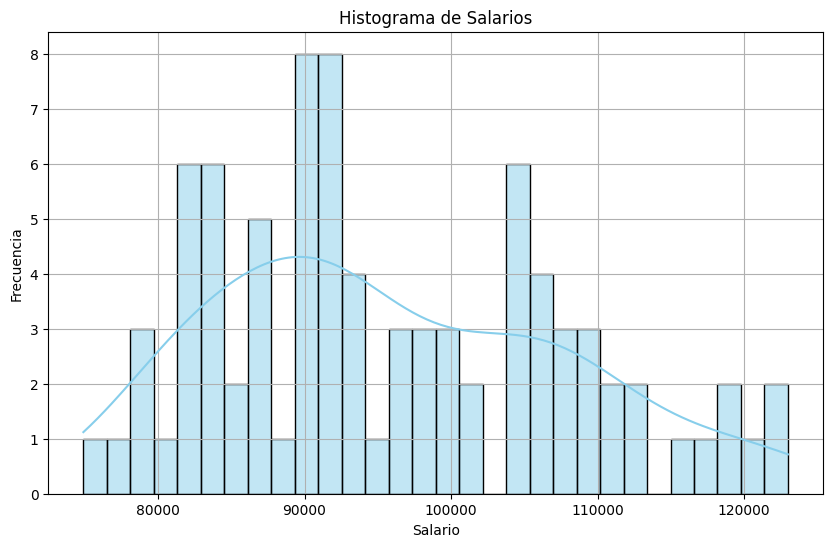

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

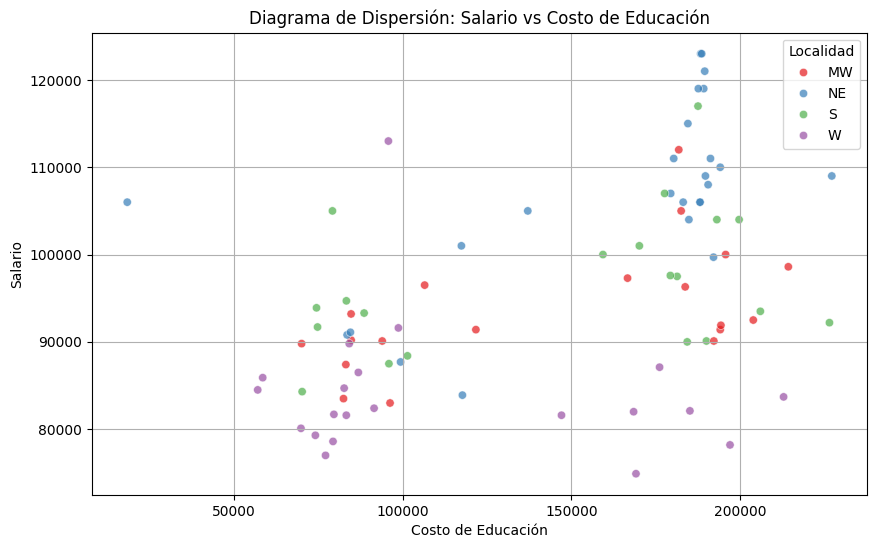

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sel, x='cost', y='salary', hue='location', palette='Set1', alpha=0.7)
plt.title('Diagrama de Dispersión: Salario vs Costo de Educación')
plt.xlabel('Costo de Educación')
plt.ylabel('Salario')
plt.legend(title='Localidad')
plt.grid()
plt.show()

<ipython-input-29-75c1fb6036aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sel, x='location', y='cost', palette='Set1')


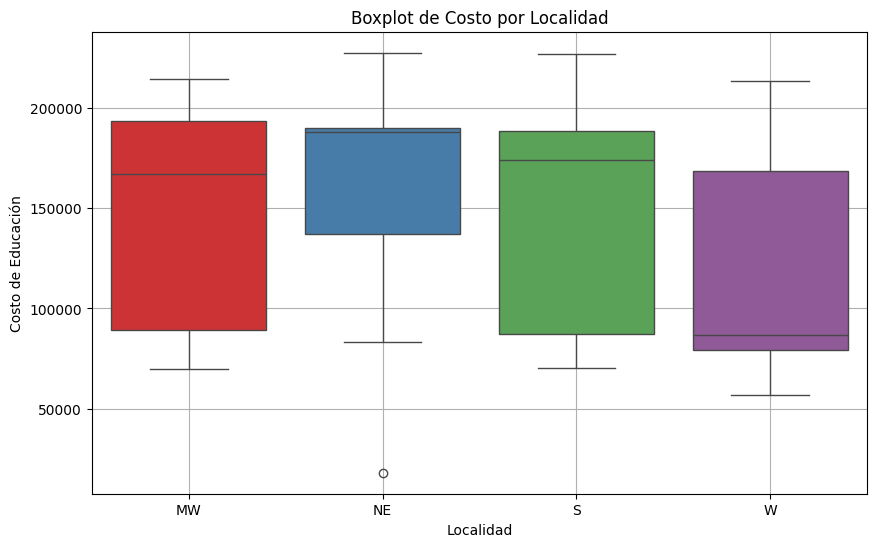

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sel, x='location', y='cost', palette='Set1')
plt.title('Boxplot de Costo por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Costo de Educación')
plt.grid()
plt.show()

# 3. Construcción del modelo de regresión

- Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding.
- Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos.

*Por cada unidad adicional en el salario, el costo aumenta en 2.03 unidades.
Vivir en location S incrementa el costo en 10140 unidades en comparación.
Vivir en location NE reduce el costo en 1255 unidades
Vivir en location W reduce el costo en 11120 unidades*


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_encoded = pd.get_dummies(df_sel, columns=['location'], drop_first=False)

X = df_encoded.drop('cost', axis=1)
y = df_encoded['cost']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
salary           2.030553
location_MW   2235.142025
location_NE  -1255.138667
location_S   10140.080161
location_W  -11120.083518


# 4. Análisis de Residuos

- Construyen una visualización de predicciones (salario estimado) vs valores reales (salario real).
- Crea una gráfica de los errores residuales. Discute lo que observas

*Algunos puntos están bastante lejos de la línea, especialmente en los rangos de salario más altos, lo que indica errores de predicción mayores para esos casos.*

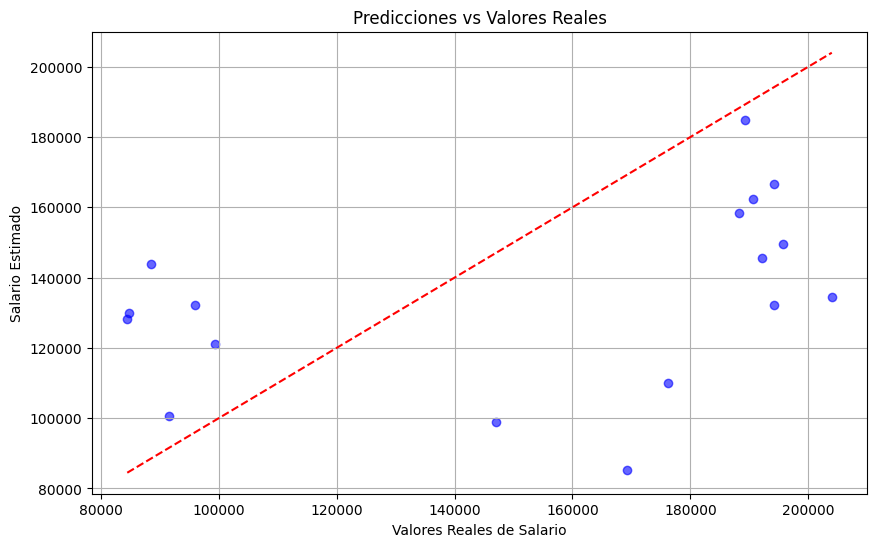

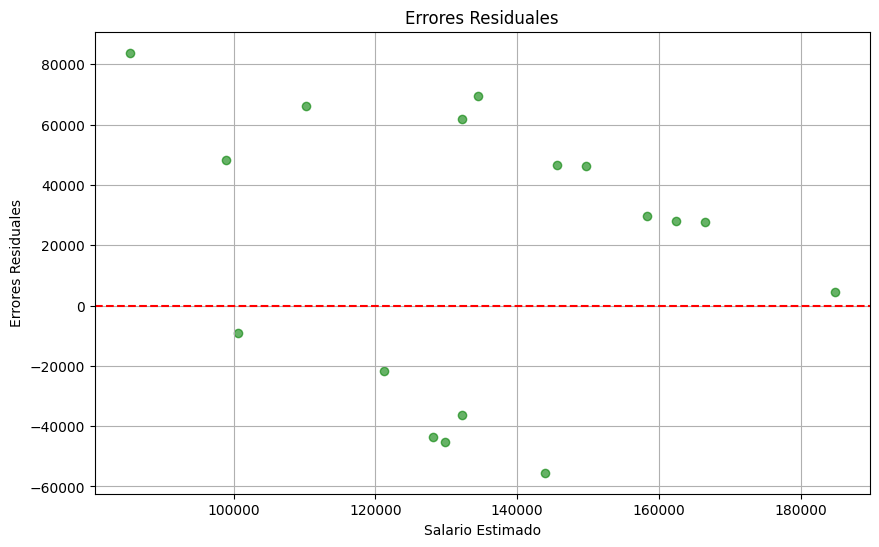

In [ ]:
y_pred = model.predict(X_test)


# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales de Salario')
plt.ylabel('Salario Estimado')
plt.grid()
plt.show()

residuals = y_test - y_pred

# Gráfica de errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Línea de referencia en 0
plt.title('Errores Residuales')
plt.xlabel('Salario Estimado')
plt.ylabel('Errores Residuales')
plt.grid()
plt.show()


# 5. Evalúa el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).
- Calcula el R² Score

Discute estos resultados obtenidos.

El error Cuadrático Medio de 2234547569.26 es muy alto entonces el modelo no está haciendo predicciones muy precisas.

El R² Score de aproximadamente 0.22 indica que solo el 22.2% lo que es muy bajo y significa que el modelo no es muy efectivo para predecir el salario basado en las variables de costo y ubicación.

In [ ]:
from sklearn.metrics import mean_squared_error

y_full_pred = model.predict(X)

mse = mean_squared_error(y, y_full_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')




Error Cuadrático Medio (MSE): 2234547569.2646303


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_full_pred)
print(f'R² Score: {r2}')

R² Score: 0.2220687713142393


# 6. Realiza un análisis de varianza con stastmodel

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html


In [5]:
import statsmodels.api as sm
import pandas as pd


salarios = df[['salary', 'cost', 'location']].dropna()

modelo = sm.MixedLM.from_formula("salary ~ cost",
                                  data=salarios,
                                  re_formula='1',
                                  groups=salarios['location'])

resultado = modelo.fit()
print(resultado.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  salary       
No. Observations:    85       Method:              REML         
No. Groups:          4        Scale:               64259988.9170
Min. group size:     19       Log-Likelihood:      -883.7724    
Max. group size:     25       Converged:           Yes          
Mean group size:     21.2                                       
----------------------------------------------------------------
             Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------
Intercept    86475.116 4755.851 18.183 0.000 77153.819 95796.412
cost             0.063    0.017  3.619 0.000     0.029     0.097
Group Var 63375113.891 6902.606                                 

